In [1]:
!git clone https://github.com/Z-Zheng/Changen.git
!pip install ever-beta

Cloning into 'Changen'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47 (delta 21), reused 33 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 16.94 KiB | 4.23 MiB/s, done.
Resolving deltas: 100% (21/21), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 2.4 MB/s eta 0:00:00


In [2]:
%cd Changen

/content/Changen


In [3]:
import torch

model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='r18',
               pretrained=True, dataset_name='levircd', force_reload=True)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/Z-Zheng/Changen/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Single Data Test

In [5]:
from PIL import Image
import numpy as np

t1_path = "/content/drive/MyDrive/Datasets/test_data/t1_rgb/0016.png"
t2_path = "/content/drive/MyDrive/Datasets/test_data/t2_rgb/0016.png"

# Load the images
t1_image = Image.open(t1_path)
t2_image = Image.open(t2_path)


# Convert the images to numpy arrays
t1_array = np.array(t1_image).astype(np.float32) / 255.0
t2_array = np.array(t2_image).astype(np.float32) / 255.0

# Reorder the dimensions to (channels, height, width)
t1_array = torch.tensor(np.transpose(t1_array, (2, 0, 1)))  # (height, width, channels) -> (channels, height, width)
t2_array = torch.tensor(np.transpose(t2_array, (2, 0, 1)))  # (height, width, channels) -> (channels, height, width)

# Verify the shape
print(f"t1_array shape: {t1_array.shape}")
print(f"t2_array shape: {t2_array.shape}")

t1_array shape: torch.Size([3, 512, 512])
t2_array shape: torch.Size([3, 512, 512])


In [6]:
bi_images = torch.cat([t1_array.unsqueeze(0), t2_array.unsqueeze(0)], dim=1)  # [b, tc, h, w]
bi_images.shape

torch.Size([1, 6, 512, 512])

In [7]:
bi_images = bi_images.float()
bi_images

tensor([[[[0.1098, 0.0941, 0.0980,  ..., 0.0745, 0.0824, 0.0667],
          [0.1020, 0.0980, 0.0980,  ..., 0.0863, 0.0706, 0.0667],
          [0.0706, 0.0706, 0.0706,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.2039, 0.1412, 0.0824,  ..., 0.1490, 0.1255, 0.0824],
          [0.1647, 0.1216, 0.0706,  ..., 0.1451, 0.1216, 0.0667],
          [0.1373, 0.0902, 0.0784,  ..., 0.1059, 0.0941, 0.0549]],

         [[0.1098, 0.0941, 0.0863,  ..., 0.0745, 0.0863, 0.0627],
          [0.0784, 0.0863, 0.0784,  ..., 0.0902, 0.0745, 0.0706],
          [0.0784, 0.0784, 0.0784,  ..., 0.0824, 0.0784, 0.0784],
          ...,
          [0.1922, 0.1647, 0.1451,  ..., 0.1529, 0.1294, 0.0863],
          [0.1765, 0.1608, 0.1412,  ..., 0.1137, 0.1098, 0.0667],
          [0.1686, 0.1529, 0.1490,  ..., 0.0824, 0.0784, 0.0549]],

         [[0.0667, 0.0549, 0.0627,  ..., 0.0471, 0.0549, 0.0392],
          [0.0471, 0.0510, 0.0471,  ..., 0.0549, 0.0510, 0.0392],
          [0.0431, 0.0431, 0.0510,  ..., 0

In [8]:
predictions = model(bi_images)
change_prob = predictions['change_prediction']  # [b, 1, h, w]

In [9]:
change_prob

tensor([[[[5.6703e-05, 5.0165e-05, 4.4381e-05,  ..., 3.0518e-07,
           1.2563e-07, 5.1721e-08],
          [7.2644e-05, 6.4830e-05, 5.7858e-05,  ..., 7.4096e-07,
           3.6320e-07, 1.7804e-07],
          [9.3065e-05, 8.3783e-05, 7.5426e-05,  ..., 1.7990e-06,
           1.0500e-06, 6.1285e-07],
          ...,
          [1.3878e-05, 8.1123e-06, 4.7420e-06,  ..., 4.6735e-05,
           4.9292e-05, 5.1989e-05],
          [1.5424e-05, 9.4518e-06, 5.7920e-06,  ..., 7.7653e-05,
           6.9849e-05, 6.2830e-05],
          [1.7142e-05, 1.1012e-05, 7.0744e-06,  ..., 1.2902e-04,
           9.8978e-05, 7.5932e-05]]]], grad_fn=<SigmoidBackward0>)

In [10]:
# Assuming change_prob is a 4D tensor with shape [batch_size, 1, height, width]
# Apply a threshold to get the binary mask (threshold is commonly set to 0.5)
binary_mask = (change_prob >= 0.5).float()  # Thresholding the probabilities at 0.5

# You can convert to uint8 for display purposes (values will be 0 or 1)
binary_mask_uint8 = (binary_mask * 255).to(torch.uint8)  # Convert to 0 or 255 for image display

# Since we have a batch dimension, we can take the first image (batch[0]) and the first channel (change prediction)
binary_mask_image = binary_mask_uint8[0, 0, :, :].cpu().numpy()  # Convert to NumPy array for plotting


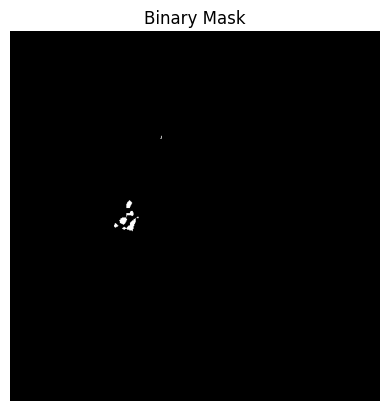

In [11]:
import matplotlib.pyplot as plt

# Display the binary mask
plt.imshow(binary_mask_image, cmap='gray')
plt.title("Binary Mask")
plt.axis("off")  # Hide the axes for cleaner display
plt.show()

## Batch Evaluation

In [12]:
import os
import json
import imageio.v3 as imageio
from sklearn.metrics import (
    jaccard_score, f1_score, precision_score, recall_score, accuracy_score, cohen_kappa_score
)

In [18]:
# Paths and model setup
base_path = '/content/drive/MyDrive/Datasets/test_data/'
t1_path = os.path.join(base_path, 't1_rgb')
t2_path = os.path.join(base_path, 't2_rgb')
gt_path = os.path.join(base_path, 'gt_grayscale')
test_out_path = "/content/drive/MyDrive/Datasets/test_data/"
metrics_out_file = os.path.join(test_out_path, "metrics_results.json")

In [19]:
# Evaluation metrics function
def evaluate_metrics(predicted, ground_truth):
    # Flatten both arrays
    predicted = predicted.flatten()
    ground_truth = ground_truth.flatten()

    # Normalize to binary labels if necessary (0 and 1)
    if 255 in predicted or 255 in ground_truth:
        predicted = (predicted / 255).astype(int)
        ground_truth = (ground_truth / 255).astype(int)

    # Calculate metrics
    metrics = {
        "Jaccard Index (IoU)": jaccard_score(ground_truth, predicted, average="binary"),
        "F1 Score": f1_score(ground_truth, predicted, average="binary"),
        "Precision": precision_score(ground_truth, predicted, average="binary"),
        "Recall": recall_score(ground_truth, predicted, average="binary"),
        "Accuracy": accuracy_score(ground_truth, predicted),
        "Cohen's Kappa Score": cohen_kappa_score(ground_truth, predicted)
    }
    return metrics

In [22]:
# Initialize variables to track the sum of each metric
metric_sums = {
    "Jaccard Index (IoU)": 0,
    "F1 Score": 0,
    "Precision": 0,
    "Recall": 0,
    "Accuracy": 0,
    "Cohen's Kappa Score": 0
}

# Total number of images processed
num_images = 0
all_metrics = {}

for filename in os.listdir(t1_path):
    t1_image_path = os.path.join(t1_path, filename)
    t2_image_path = os.path.join(t2_path, filename)
    gt_image_path = os.path.join(gt_path, filename)

    # Check if corresponding files exist
    if not os.path.isfile(t2_image_path) or not os.path.isfile(gt_image_path):
        print(f"Missing corresponding file for {filename}")
        continue

   # Load the images
    t1_image = Image.open(t1_image_path)
    t2_image = Image.open(t2_image_path)
    gt_image = Image.open(gt_image_path)


    # Convert the images to numpy arrays
    t1_array = np.array(t1_image).astype(np.float32)
    t2_array = np.array(t2_image).astype(np.float32)
    gt_image = np.array(gt_image)

    # Reorder the dimensions to (channels, height, width)
    t1_array = torch.tensor(np.transpose(t1_array, (2, 0, 1)))  # (height, width, channels) -> (channels, height, width)
    t2_array = torch.tensor(np.transpose(t2_array, (2, 0, 1)))  # (height, width, channels) -> (channels, height, width)

    bi_images = torch.cat([t1_array.unsqueeze(0), t2_array.unsqueeze(0)], dim=1)
    bi_images = bi_images.float()

    # Model prediction
    predictions = model(bi_images)
    change_prob = predictions['change_prediction']  # [b, 1, h, w]

    # Assuming change_prob is a 4D tensor with shape [batch_size, 1, height, width]
    # Apply a threshold to get the binary mask (threshold is commonly set to 0.5)
    binary_mask = (change_prob >= 0.5).float()  # Thresholding the probabilities at 0.5

    # You can convert to uint8 for display purposes (values will be 0 or 1)
    binary_mask_uint8 = (binary_mask * 255).to(torch.uint8)  # Convert to 0 or 255 for image display

    # Since we have a batch dimension, we can take the first image (batch[0]) and the first channel (change prediction)
    binary_mask_image = binary_mask_uint8[0, 0, :, :].cpu().numpy()  # Convert to NumPy array for plotting


    # Save the output change map for visualization
    imageio.imwrite(os.path.join(test_out_path, f"{filename}_change.png"), binary_mask_image)

    # Evaluate metrics
    metrics = evaluate_metrics(binary_mask_image, gt_image)
    print(f"Metrics for {filename}: {metrics}")

    # Save metrics for this image
    all_metrics[filename] = metrics

    # Add metrics to the sums
    for metric_name in metrics:
        metric_sums[metric_name] += metrics[metric_name]

    num_images += 1

# Calculate the average of each metric
if num_images > 0:
    avg_metrics = {metric: metric_sums[metric] / num_images for metric in metric_sums}
    print("\nAverage Metrics:")
    for metric, avg_value in avg_metrics.items():
        print(f"{metric}: {avg_value:.4f}")

    # Save metrics to JSON
    all_metrics["Average"] = avg_metrics
    with open(metrics_out_file, "w") as f:
        json.dump(all_metrics, f, indent=4)
    print(f"Metrics saved to {metrics_out_file}")
else:
    print("No images processed.")

(512, 512)
(512, 512)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for 0139_1.png: {'Jaccard Index (IoU)': 0.0, 'F1 Score': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'Accuracy': 0.9928550720214844, "Cohen's Kappa Score": 0.0}
Metrics for 0049.png: {'Jaccard Index (IoU)': 0.0, 'F1 Score': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'Accuracy': 0.97467041015625, "Cohen's Kappa Score": -0.008929490850107413}
(512, 512)
(512, 512)
Metrics for 0107.png: {'Jaccard Index (IoU)': 0.382183908045977, 'F1 Score': 0.553014553014553, 'Precision': 0.5112107623318386, 'Recall': 0.6022641509433962, 'Accuracy': 0.9950790405273438, "Cohen's Kappa Score": 0.5505570895916831}
(512, 512)
(512, 512)
Metrics for 0016.png: {'Jaccard Index (IoU)': 0.0, 'F1 Score': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'Accuracy': 0.9936904907226562, "Cohen's Kappa Score": -0.0020514468228429728}
(512, 512)
(512, 512)
Metrics for 0139.png: {'Jaccard Index (IoU)': 0.06287987622941761, 'F1 Score': 0.11831981700977334, 'Precision': 0.06460769842171, 'Recall': 0.7016029593094945, 'Accuracy': 0.96765

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(512, 512)
(512, 512)
Metrics for 0073.png: {'Jaccard Index (IoU)': 0.0, 'F1 Score': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'Accuracy': 0.9563751220703125, "Cohen's Kappa Score": -0.021782226050818032}
(512, 512)
(512, 512)
Metrics for 0116.png: {'Jaccard Index (IoU)': 0.0025833724753405356, 'F1 Score': 0.005153431717029749, 'Precision': 0.0037250253979004403, 'Recall': 0.008358662613981762, 'Accuracy': 0.9837989807128906, "Cohen's Kappa Score": -0.0018042752817539753}
(512, 512)
(512, 512)
Metrics for 0137.png: {'Jaccard Index (IoU)': 0.3200898255311798, 'F1 Score': 0.48495158335514266, 'Precision': 0.8343088698784331, 'Recall': 0.3418188526102195, 'Accuracy': 0.9849853515625, "Cohen's Kappa Score": 0.47868528615315153}

Average Metrics:
Jaccard Index (IoU): 0.0768
F1 Score: 0.1161
Precision: 0.1414
Recall: 0.1654
Accuracy: 0.9671
Cohen's Kappa Score: 0.1101
Metrics saved to /content/drive/MyDrive/Datasets/test_data/metrics_results.json
